## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston.loc[:,'medv']

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regr = DecisionTreeRegressor(max_depth=3)

regr.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [8]:
path = regr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([ 0.        ,  1.44686438,  1.8566855 ,  2.36788932,  4.79303831,
        6.30359173, 14.42859577, 42.13835588])

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [10]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.446864379947055, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.8566854950701206, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.367889323812581, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.793038313395394, random_state=0),
 DecisionTreeRegressor(ccp_alpha=6.303591729247657, random_state=0),
 DecisionTreeRegressor(ccp_alpha=14.428595770657289, random_state=0),
 DecisionTreeRegressor(ccp_alpha=42.13835588377753, random_state=0)]

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [18]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]

train_scores

[0.0,
 12.256326519984215,
 15.559876395001575,
 17.92776571881428,
 25.811188155362967,
 25.811188155362967,
 32.11477988460997,
 88.68173153904524]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

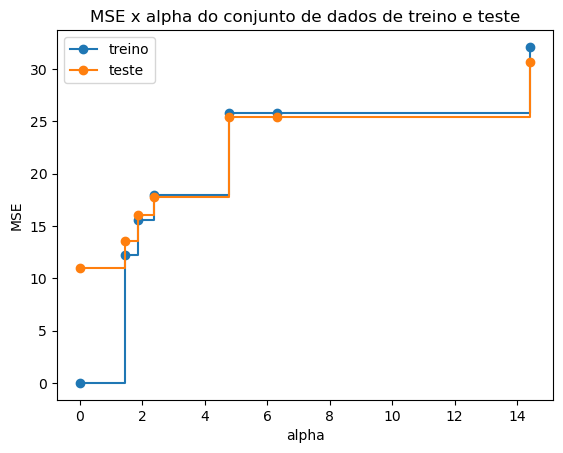

In [20]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


O valor de ccp_alpha=1.446864379947055 mais proximo ao ponto minino de MSE.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [34]:
clf = DecisionTreeRegressor(random_state=0, max_depth=3, ccp_alpha=1.446864379947055)
clf.fit(X_train, y_train)



DecisionTreeRegressor(ccp_alpha=1.446864379947055, max_depth=3, random_state=0)

In [36]:
mse = clf.score(X_train, y_train)
mse

0.8269461998903241

### 7. Visualize esta árvore.

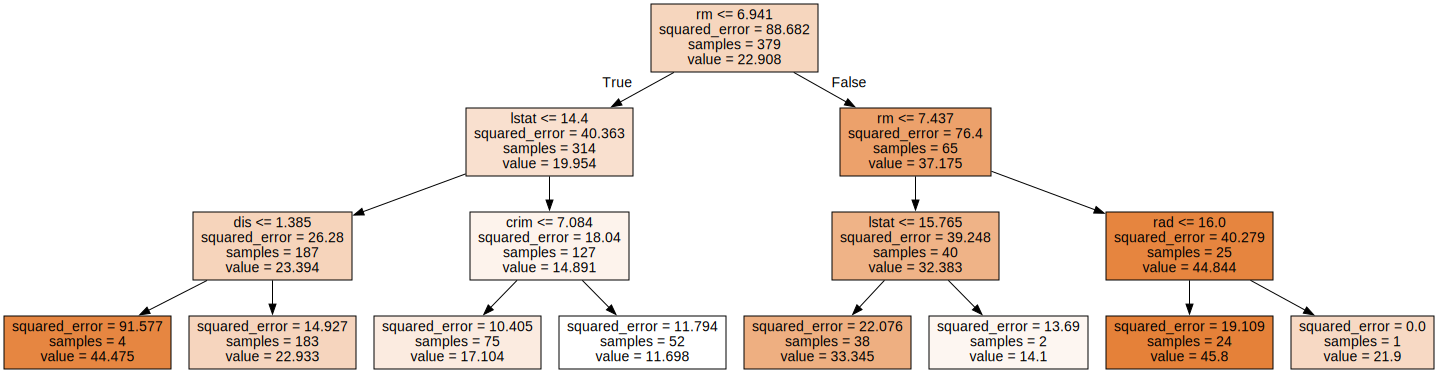

In [27]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph